In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

In [10]:
hier_df = DataFrame(
    np.arange(9).reshape((3, 3)),
    index = [
        ['a', 'a', 'b'],
        [1, 2, 2]
    ],
    columns = [
        ['Osaka', 'Tokyo', 'Osaka'],
        ['Blue', 'Red', 'Red']
    ]
)
hier_df

Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8

In [11]:
hier_df.index.names = ['key1', 'key2']

hier_df.columns.names = ['city', 'color']
hier_df

city      Osaka Tokyo Osaka
color      Blue   Red   Red
key1 key2                  
a    1        0     1     2
     2        3     4     5
b    2        6     7     8

In [12]:
hier_df['Osaka']

color      Blue  Red
key1 key2           
a    1        0    2
     2        3    5
b    2        6    8

In [13]:
hier_df.sum(level = 'key2', axis=0)

city,Osaka,Tokyo,Osaka
color,Blue,Red,Red
key2,,,
1,0,1,2
2,9,11,13


In [14]:
hier_df.sum(level='color', axis=1)

color      Blue  Red
key1 key2           
a    1        0    3
     2        3    9
b    2        6   15

In [15]:
hier_df1 = DataFrame(
    np.arange(12).reshape((3, 4)),
    index = [['c', 'd', 'd'], [1, 2, 1]],
    columns = [
        ['Kyoto', 'Nagoya', 'Hokkaido', 'Kyoto'],
        ['Yellow', 'Yellow', 'Red', 'Blue']
    ]
)

hier_df1.index.names = ['key1', 'key2']
hier_df1.columns.names = ['city', 'color']
hier_df1

city       Kyoto Nagoya Hokkaido Kyoto
color     Yellow Yellow      Red  Blue
key1 key2                             
c    1         0      1        2     3
d    2         4      5        6     7
     1         8      9       10    11

In [16]:
hier_df1.columns

MultiIndex([(   'Kyoto', 'Yellow'),
            (  'Nagoya', 'Yellow'),
            ('Hokkaido',    'Red'),
            (   'Kyoto',   'Blue')],
           names=['city', 'color'])

In [21]:
# hier_df1['Yellow']
# hier_df1['Kyoto']
hier_df1['Kyoto']['Yellow']
# hier_df1.loc['Kyoto']

key1  key2
c     1       0
d     2       4
      1       8
Name: Yellow, dtype: int32

In [24]:
# hier_df1.sum(level='city', axis=1)
hier_df1.mean(level='city', axis=1)

city       Kyoto  Nagoya  Hokkaido
key1 key2                         
c    1       1.5     1.0       2.0
d    2       5.5     5.0       6.0
     1       9.5     9.0      10.0

In [26]:
hier_df1.sum(level='key2', axis=0)

city,Kyoto,Nagoya,Hokkaido,Kyoto
color,Yellow,Yellow,Red,Blue
key2,,,,
1,8,10,12,14
2,4,5,6,7


In [28]:
# birth_year_bins = [1980, 1985, 1990, 1995, 2000]

# birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins)
# birth_year_cut_data

### 時系列データの取り扱いの基礎

In [33]:
# !pip install pandas_datareader

In [34]:
import pandas_datareader.data as pdr

In [36]:
start_date = '2001/1/2'
end_date = '2016/12/30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date)

In [37]:
fx_jpusdata.head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97


In [38]:
fx_jpusdata['2016-04']

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98
2016-04-08,108.36
2016-04-11,107.96
2016-04-12,108.54
2016-04-13,109.21


In [39]:
fx_jpusdata.resample('M').last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


In [40]:
fx_jpusdata.resample('D').last().head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-06,NaN


In [41]:
fx_jpusdata.resample('D').ffill().head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-06,116.19


### データをずらして比率を計算する

In [42]:
fx_jpusdata.shift(1).head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,114.73
2001-01-04,114.26
2001-01-05,115.47
2001-01-08,116.19


In [43]:
fx_jpusdata_ratio = fx_jpusdata / fx_jpusdata.shift(1)
fx_jpusdata_ratio.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,0.995903
2001-01-04,1.010590
2001-01-05,1.006235
2001-01-08,0.998107


In [45]:
?fx_jpusdata.pct_change

Signature:
fx_jpusdata.pct_change(
    periods=1,
    fill_method='pad',
    limit=None,
    freq=None,
    **kwargs,
)
Docstring:
Percentage change between the current and a prior element.

Computes the percentage change from the immediately previous row by
default. This is useful in comparing the percentage of change in a time
series of elements.

Parameters
----------
periods : int, default 1
    Periods to shift for forming percent change.
fill_method : str, default 'pad'
    How to handle NAs before computing percent changes.
limit : int, default None
    The number of consecutive NAs to fill before stopping.
freq : DateOffset, timedelta, or offset alias string, optional
    Increment to use from time series API (e.g. 'M' or BDay()).
**kwargs
    Additional keyword arguments are passed into
    `DataFrame.shift` or `Series.shift`.

Returns
-------
chg : Series or DataFrame
    The same type as the calling object.

See Also
--------
Series.diff : Compute the difference of two eleme

#### 練習問題6-16

In [47]:
fx_jpusdata.resample('Y').mean()

,DEXJPUS
DATE,
2001-12-31,121.568040
2002-12-31,125.220438
2003-12-31,115.938685
2004-12-31,108.150830
2005-12-31,110.106932
2006-12-31,116.312072
2007-12-31,117.762323
2008-12-31,103.390635
2009-12-31,93.682659


In [49]:
fx_jpusdata['2001'].mean()

DEXJPUS    121.56804
dtype: float64

### 移動平均

In [50]:
fx_jpusdata.head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97


In [51]:
fx_jpusdata.rolling(3).mean().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,114.820000
2001-01-05,115.306667
2001-01-08,115.876667


In [53]:
# ?np.mean
np.mean([114.73, 114.26, 115.47])

114.82000000000001

In [54]:
fx_jpusdata.rolling(3).std().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.610000
2001-01-05,0.975312
2001-01-08,0.368963


In [55]:
?fx_jpusdata.rolling

Signature:
fx_jpusdata.rolling(
    window,
    min_periods=None,
    center=False,
    win_type=None,
    on=None,
    axis=0,
    closed=None,
)
Docstring:
Provide rolling window calculations.

.. versionadded:: 0.18.0

Parameters
----------
window : int, or offset
    Size of the moving window. This is the number of observations used for
    calculating the statistic. Each window will be a fixed size.

    If its an offset then this will be the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes. This is
    new in 0.19.0
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is NA). For a window that is specified by an offset,
    `min_periods` will default to 1. Otherwise, `min_periods` will default
    to the size of the window.
center : bool, default False
    Set the labels at the center of t

#### 練習問題6-17

In [62]:
fx_jpusdata.rolling(20).mean()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,NaN
2001-01-05,NaN
2001-01-08,NaN
...,...
2001-05-15,122.2945
2001-05-16,122.3565
2001-05-17,122.3970


In [64]:
dir(fx_jpusdata.rolling(2).mean())

['DEXJPUS',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A1DBD48D0>]],
      dtype=object)

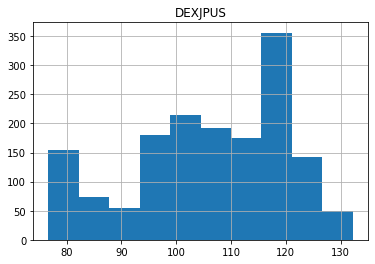

In [69]:
fx_jpusdata.rolling(20).mean().dropna().hist()

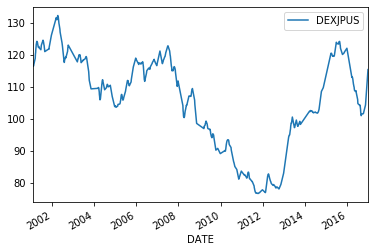

In [70]:
fx_jpusdata.rolling(20).mean().dropna().plot()